1) Implement a reinforcement learning agent in Python and illustrate the steps involved in designing a basic
Reinforcement learning (RL) system.

In [8]:
import random
import pandas as pd

In [13]:
class Environment:
    def __init__(self):
        self.steps_left = 100

    def get_observation(self):
        return [0.0, 0.0, 0.0, 0.0]

    def get_actions(self):
        return [0, 1]

    def is_done(self):
        return self.steps_left == 0

    def action(self, action):
        if self.is_done():
            print("Game Over")
        self.steps_left -= 1
        return random.random()

class Agent:
    def __init__(self):
        self.total_reward = 0.0

    def steps(self, env):
        current_obs = env.get_observation()
        actions = env.get_actions()
        reward = env.action(random.choice(actions))
        self.total_reward += reward

In [14]:
env = Environment()
agent = Agent()

while not env.is_done():
    agent.steps(env)
print("Total reward got: %d " % agent.total_reward)

Total reward got: 49 


2) Formulate Multi-armed Bandit (MAB) problem for the scenario discussed below. The website
www.adwinning.com has five banners for a single advertisement. The task of the advertiser is to find the best
advertisement banner that is liked by most of the customers. Hence, devise a solution by implementing a
suitable exploration strategy.


In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.DataFrame()
for i in range(5):
    df['Banner: '+str(i)] = np.random.randint(1,5,1000)

In [17]:
num_interations=100
num_banner=5

count=np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)

banner_selected=[]

In [18]:
def epsilon_greedy_policy(epsilon): #Agent Policy
   if np.random.uniform(0,1) < epsilon: #Explore
       return np.random.choice(num_banner)
   else:
       return np.argmax(Q) #Exploit

In [19]:
for i in range(num_interations):
   banner=epsilon_greedy_policy(0.5)
   reward=df.values[i,banner]
   count[banner] +=1
   
   sum_rewards[banner]+=reward
   Q[banner] =sum_rewards[banner]/count[banner]
   banner_selected.append(banner)

In [20]:
print('The optimal banner is banner {}'.format(np.argmax(Q)))

The optimal banner is banner 0


3) In certain situations you have to select one action from a set of 10 possible actions (for that particular state).
After each choice you receive a numerical reward chosen from a stationary probability distribution (i.e. the
true reward does not change) depending upon the action you selected. Your objective is to maximize the
expected total reward over some time period. Formalize the above scenario as k-armed bandit problem and
implement in Python to illustrate the exploration and exploitation strategy with epsilon value 0.5.

In [22]:
import numpy as np
import pandas as pd

In [23]:
df = pd.DataFrame()
for i in range(10):
    df['Action:'+str(i)] = np.random.randint(0,2,100)

In [24]:
num_interations=10
num_banner=10
count=np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
banner_selected=[]

In [25]:
def epsilon_greedy_policy(epsilon): #Agent Policy
    if np.random.uniform(0,1) < epsilon: #Explore
       np.random.seed(1)
       return np.random.choice(num_banner)
    else:
       return np.argmax(Q) #Exploit

In [26]:
for i in range(num_interations):
   banner=epsilon_greedy_policy(0.5)
   reward=df.values[i,banner] 
   count[banner] +=1
   sum_rewards[banner]+=reward
   Q[banner] =sum_rewards[banner]/count[banner]
   banner_selected.append(banner)

In [27]:
print('The optimal ARM:{}'.format(np.argmax(Q)))

The optimal ARM:0


4) A doctor aims at evaluating ‘k’ possible treatments for an epidemic disease in which incoming patients are
partitioned into k groups. The actions are treatment, reward is survival or death of the patient and it is set to 1,
if treatment is successful, otherwise 0. After a while the majority of patients can be put to the best found
treatment. Formalize the above scenario as k-armed bandit problem and implement in Python to illustrate the
exploration and exploitation strategy with epsilon value 0.5.


In [28]:
import numpy as np

In [31]:
def k_armed_bandit(k, epsilon, num_episodes):
    true_rewards = np.random.random(k)
    estimated_rewards = np.zeros(k)
    arm_counts = np.zeros(k)

    for episode in range(num_episodes):
        if np.random.random() < epsilon:
            chosen_arm = np.random.choice(k)
        else:
            chosen_arm = np.argmax(estimated_rewards)

        reward = np.random.binomial(1, true_rewards[chosen_arm])
        arm_counts[chosen_arm] += 1
        estimated_rewards[chosen_arm] += (reward - estimated_rewards[chosen_arm])
    return estimated_rewards

In [32]:
k = 5
epsilon = 0.5
num_episodes = 1000 
estimated_rewards = k_armed_bandit(k, epsilon, num_episodes)
print("Estimated rewards for each arm:", estimated_rewards)

Estimated rewards for each arm: [0. 1. 1. 1. 1.]


5) Define methods for various types of exploration strategies with illustrative comparison of results for the
scenario in Q.4.


In [33]:
df=pd.DataFrame()

num_iter=100
k_treatment=7

for i in range(k_treatment):
    df['Treatment_type_'+str(i)]=np.random.randint(0,2,100000)

count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]
Q_results=[]
Best_treatment_all=[]


In [34]:
def softmax(T):
    denom=sum([np.exp(i/T) for i in Q])
    probs=[np.exp(i/T)/denom for i in Q]
    arm=np.random.choice(k_treatment,p=probs)
    return arm

def thompson_sampling(alpha,beta):
    samples=[np.random.beta(alpha[i]+1,beta[i]+1) for i in range(k_treatment)]
    return np.argmax(samples)

def UCB(i):
    ucb=np.zeros(k_treatment)
    if i< 2:
        return i
    else:
        for arm in range(k_treatment):
            ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])
        return np.argmax(ucb)
    
def epsilon_greedy(epsilon):
    if 1/k_treatment<epsilon: 
        return np.random.choice(k_treatment)
    else:
        return np.argmax(Q)

In [35]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

In [36]:
for i in range(num_iter):
    treatment = epsilon_greedy(0.5)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)


In [37]:
Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

In [38]:
count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

In [39]:
T=50

In [40]:
for i in range(num_iter):
    treatment = softmax(0.5)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)
    T=T*0.99

Q_results.append(Q) 
Best_treatment_all.append(np.argmax(Q)+1)


In [42]:
alpha=np.zeros(k_treatment)
beta=np.zeros(k_treatment)

count= np.zeros(k_treatment)
sum_rewards=np.zeros(k_treatment)
Q=np.zeros(k_treatment)
selected_treatment=[]

In [48]:
for i in range(num_iter):
    treatment = UCB(i)
    reward=df.values[i,treatment]
    count[treatment] += 1
    sum_rewards[treatment] += reward
    Q[treatment] = sum_rewards[treatment] / count[treatment]
    selected_treatment.append(treatment)

    if reward==1:
        alpha[treatment]=alpha[treatment]+1
    else:
         beta[treatment]=beta[treatment]+1


In [49]:
Q_results.append(Q)
Best_treatment_all.append(np.argmax(Q)+1)

In [50]:
methods={
    0:"Epsilon Greedy",
    1:"Softmax Exploration",
    2:"Upper Confidence Bound",
    3:"Thompson Sampling"
}

for i in range(len(methods)):
    print("\n",methods[i], "\nResult is ", Q_results[i], "\nBest treatment is ", Best_treatment_all[i])


 Epsilon Greedy 
Result is  [0.25       0.53846154 0.46666667 0.36363636 0.42857143 0.46153846
 0.46666667] 
Best treatment is  2

 Softmax Exploration 
Result is  [0.3        0.57142857 0.30769231 0.41176471 0.58333333 0.61538462
 0.35714286] 
Best treatment is  6

 Upper Confidence Bound 
Result is  [0.48484848 0.44827586 0.46875    0.3        0.4        0.55813953
 0.27777778] 
Best treatment is  1

 Thompson Sampling 
Result is  [0.48484848 0.44827586 0.46875    0.3        0.4        0.55813953
 0.27777778] 
Best treatment is  6


6) Formulate k-armed bandit and implement in Python to illustrate the exploration and exploitation strategy
with epsilon value 0.5 for the scenario given below. An online entertainment media has posted more than one
banner for a single advertisement of a popular TV show. Now you are asked to find out which banner is most
liked by the people subscribed to the media. Also, suggest a suitable reinforcement learning based solution
for a recommendation system like Netflix to personalize the artwork for TV shows according to user behavior

In [57]:
import numpy as np
import pandas as pd

In [58]:
df=pd.DataFrame()
for i in range(5):
    df['Banner_type_'+str(i)]=np.random.randint(0,2,100000)
df.head()


,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,1,0,1,0
1,0,0,1,0,0
2,0,1,1,1,0
3,1,1,0,1,0
4,1,0,0,1,0


In [59]:
num_iter=100000
num_banner=5
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

In [60]:
def thompson_sampling(alpha,beta):
    samples=[np.random.beta(alpha[i]+1,beta[i]+1) for i in range(num_banner)]
    return np.argmax(samples)


In [61]:
alpha=np.zeros(num_banner)
beta=np.zeros(num_banner)

In [62]:
for i in range(num_iter):
    banner =thompson_sampling(alpha,beta)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)
    if reward==1:
        alpha[banner]=alpha[banner]+1
    else:
        beta[banner]=beta[banner]+1


In [63]:
print(Q)

[0.47838313 0.45117845 0.48781439 0.49991077 0.49900026]


In [64]:
print("Optimal banner is ",np.argmax(Q)+1)

Optimal banner is  4


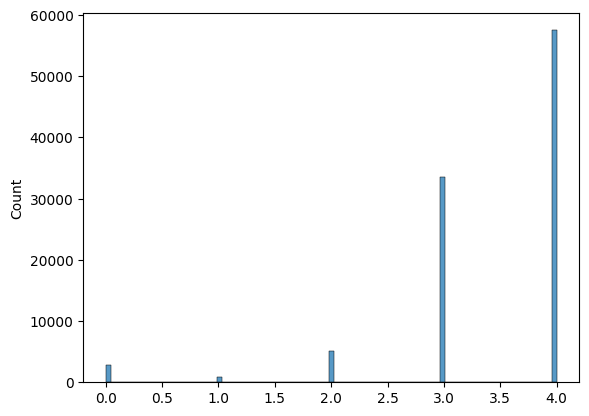

In [66]:
import seaborn as sns
ax=sns.histplot(np.array(selected_banner))
import matplotlib.pyplot as plt
plt.show()

In [67]:
num_iter=100000
num_banner=5
Q_results=[]
Best_Ad_all=[]

In [68]:
def epsilon_greedy(epsilon):
    if np.random.uniform(0,1)<epsilon: 
        return np.random.choice(num_banner) 
    else:
        return np.argmax(Q)
    
def UCB(i):
    ucb=np.zeros(num_banner)
    if i< 2:
        return i
    else:
        for arm in range(num_banner):
            ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])
        return np.argmax(ucb)


In [69]:
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

In [70]:
for i in range(num_iter):
    banner = epsilon_greedy(0.5)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)

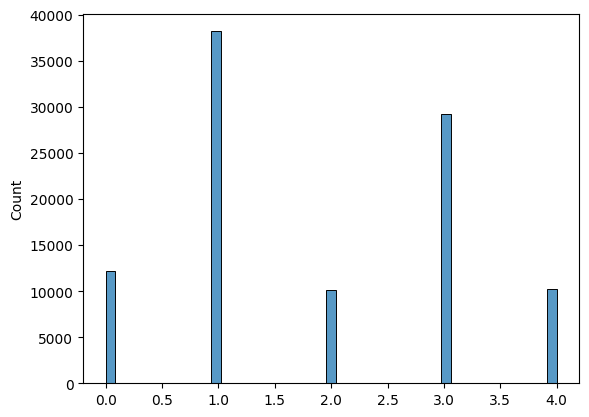

In [71]:
Q_results.append(Q)
Best_Ad_all.append(np.argmax(Q)+1)
ax=sns.histplot(np.array(selected_banner))

In [72]:
count= np.zeros(num_banner)
sum_rewards=np.zeros(num_banner)
Q=np.zeros(num_banner)
selected_banner=[]

C:\Users\smura\AppData\Local\Temp\ipykernel_11808\3877232358.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  ucb[arm]=Q[arm]+np.sqrt((2*np.log(sum(count)))/count[arm])


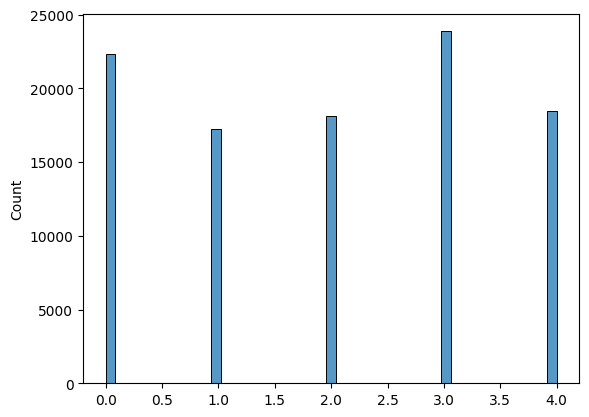

In [73]:
for i in range(num_iter):
    banner =UCB(i)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)

Q_results.append(Q)
Best_Ad_all.append(np.argmax(Q)+1)
ax=sns.histplot(np.array(selected_banner))
plt.show()


b) The epsilon value is varied between 0.15 and 0.9 for Question.7 (a) and report y
observation.

In [74]:
for epsilon in np.arange(0.15, 0.91, 0.15):
    count = np.zeros(num_banner)
    sum_rewards = np.zeros(num_banner)
    Q = np.zeros(num_banner)
    selected_banner = []

for i in range(num_iter):
    banner = epsilon_greedy(epsilon)
    reward=df.values[i,banner]
    count[banner] += 1
    sum_rewards[banner] += reward
    Q[banner] = sum_rewards[banner] / count[banner]
    selected_banner.append(banner)

print(f"Epsilon = {epsilon}")
print("Estimated Action Values:")
print(Q)
print("No of times each action was selected:")
print(count)
print("\n")
print("Optimal banner is ",np.argmax(Q)+1)

Epsilon = 0.9
Estimated Action Values:
[0.50027269 0.50222711 0.50080767 0.50511214 0.49997579]
No of times each action was selected:
[18336. 18185. 18572. 24256. 20651.]


Optimal banner is  4
